# Недообучение и переобучение
## Цель работы
Познакомиться с основными проблемами обобщающей способности алгоритмов машинного обучения: overfitting (переобучение) и underfitting (недообучение).

## Задания для выполнения
1. Загрузите первые 400 строк прилагающегося датасета diabetes.csv.
2. Сделайте количественное описание датасета: число признаков, статистику по признакам.
3. Отделите целевую переменную Outcome.
4. Разделите данные на обучающую и валидационную выборки при помощи train_test_split из библиотеки sklearn.model_selection в соотношении 80-20 (для этого укажите параметр test_size=0.2) с перемешиванием, указав значение параметра random_state=42.
5. Создайте объект DecisionTreeClassifier(random_state=1). Обучите модель на обучающих (трейновых) данных. Сделайте предсказание на трейновом и валидационном наборе признаков. Выведите значения метрики f1-scoreдля трейнового и валидационного наборов данных. По полученным значениям метрик сделайте предположение о переобученности модели.
6. Произведите кросс-валидацию с использованием функции cross_validate из библиотеки sklearn.model_selection. По полученным данным, постройте график зависимости значений f1-score от набора данных соответствующей итерации. По графику убедитесь в том, что имеет место переобученность модели.
7. Для борьбы с переобучением регуляризуйте модель DecisionTreeClassifier, уменьшив глубину дерева, указав параметр регуляризации max_depth=3.
8. Снова проделайте пункт 6 с учётом регуляризации и убелитесь по графику в том, что модель больше не является переобученной.
9. Теперь рассмотрите проблему недообучения модели. Для борьбы с недообучением модели добавьте данные. Для этого загрузите все строки датасета diabetes.csv.
10. Обучите модель DecisionTreeClassifier(random_state=1, max_depth=3) на всех данных и убедитесь в том, что значение метрики f1-score улучшилось.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Загрузите первые 400 строк прилагающегося датасета diabetes.csv.

In [2]:
df = pd.read_csv('data/diabetes.csv', nrows=400)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 2. Сделайте количественное описание датасета: число признаков, статистику по признакам.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               400 non-null    int64  
 1   Glucose                   400 non-null    int64  
 2   BloodPressure             400 non-null    int64  
 3   SkinThickness             400 non-null    int64  
 4   Insulin                   400 non-null    int64  
 5   BMI                       400 non-null    float64
 6   DiabetesPedigreeFunction  400 non-null    float64
 7   Age                       400 non-null    int64  
 8   Outcome                   400 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 28.2 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,400.000000,400.00000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000
mean,3.952500,121.24000,69.060000,20.327500,81.250000,32.10775,0.487915,33.092500,0.380000
std,3.369514,32.68437,19.011575,15.599796,121.597254,8.13714,0.349619,11.325396,0.485994
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.078000,21.000000,0.000000
25%,1.000000,100.00000,64.000000,0.000000,0.000000,27.30000,0.250500,24.000000,0.000000
50%,3.000000,116.50000,71.000000,23.000000,36.000000,32.00000,0.381000,29.000000,0.000000
75%,6.000000,143.00000,80.000000,32.000000,128.250000,36.60000,0.652500,40.000000,1.000000
max,17.000000,197.00000,122.000000,60.000000,846.000000,67.10000,2.329000,69.000000,1.000000


### 3. Отделите целевую переменную Outcome.

In [7]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [8]:
X.shape, y.shape

((400, 8), (400,))

### 4. Разделите данные на обучающую и валидационную выборки при помощи train_test_split из библиотеки sklearn.model_selection в соотношении 80-20 (для этого укажите параметр test_size=0.2) с перемешиванием, указав значение параметра random_state=42.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5. Создайте объект DecisionTreeClassifier(random_state=1). Обучите модель на обучающих (трейновых) данных. Сделайте предсказание на трейновом и валидационном наборе признаков. Выведите значения метрики f1-scoreдля трейнового и валидационного наборов данных. По полученным значениям метрик сделайте предположение о переобученности модели.

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

In [12]:
dtc = DecisionTreeClassifier(random_state=1)

In [13]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [14]:
y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)

In [15]:
f1_score(y_train, y_pred_train), f1_score(y_test, y_pred_test)

(1.0, 0.6363636363636364)

Есть вероятность переобучение модели, показатель на трейновом равен 100%, когда на тестовой всего 67%.

### 6. Произведите кросс-валидацию с использованием функции cross_validate из библиотеки sklearn.model_selection. По полученным данным, постройте график зависимости значений f1-score от набора данных соответствующей итерации. По графику убедитесь в том, что имеет место переобученность модели.

In [16]:
from sklearn.model_selection import cross_validate

In [17]:
cv_results = cross_validate(dtc, X, y, cv=5, scoring='f1', return_train_score=False)

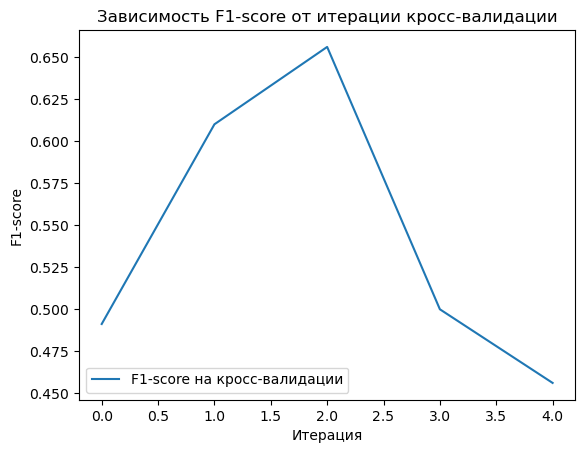

In [18]:
plt.plot(cv_results['test_score'], label='F1-score на кросс-валидации')
plt.xlabel('Итерация')
plt.ylabel('F1-score')
plt.title('Зависимость F1-score от итерации кросс-валидации')
plt.legend()
plt.show()

### 7. Для борьбы с переобучением регуляризуйте модель DecisionTreeClassifier, уменьшив глубину дерева, указав параметр регуляризации max_depth=3.

In [19]:
dtc_regularized = DecisionTreeClassifier(random_state=1, max_depth=3)

In [20]:
dtc_regularized.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [21]:
y_train_pred_regularized = dtc_regularized.predict(X_train)
y_test_pred_regularized = dtc_regularized.predict(X_test)

In [22]:
f1_score(y_train, y_train_pred_regularized), f1_score(y_test, y_test_pred_regularized)

(0.5058823529411766, 0.47826086956521735)

### 8. Снова проделайте пункт 6 с учётом регуляризации и убелитесь по графику в том, что модель больше не является переобученной.

In [23]:
cv_results_regularized = cross_validate(dtc_regularized, X, y, cv=5, scoring='f1', return_train_score=False)

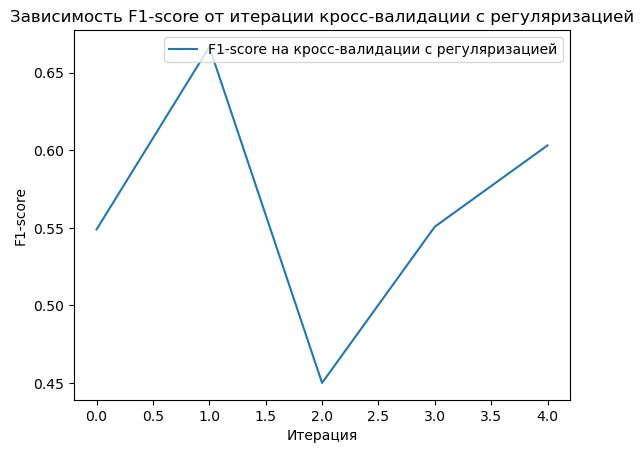

In [24]:
plt.plot(cv_results_regularized['test_score'], label='F1-score на кросс-валидации с регуляризацией')
plt.xlabel('Итерация')
plt.ylabel('F1-score')
plt.title('Зависимость F1-score от итерации кросс-валидации с регуляризацией')
plt.legend()
plt.show()

### 9. Теперь рассмотрите проблему недообучения модели. Для борьбы с недообучением модели добавьте данные. Для этого загрузите все строки датасета diabetes.csv.

In [25]:
df_full = pd.read_csv('data/diabetes.csv')

In [26]:
X_full = df_full.drop(columns=['Outcome'])
y_full = df_full['Outcome']

### 10. Обучите модель DecisionTreeClassifier(random_state=1, max_depth=3) на всех данных и убедитесь в том, что значение метрики f1-score улучшилось.

In [27]:
dtc_full = DecisionTreeClassifier(random_state=1, max_depth=3)

In [28]:
dtc_full.fit(X_full, y_full)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [29]:
y_pred_test_full = dtc_full.predict(X_full)

In [30]:
f1_score(y_full, y_pred_test_full)

0.6653696498054474

## Задания для самостоятельного выполнения

### 1. Повторите диагностику модели классификации синтетических данных с использованием других метрик эффективности - precision, recall, F1. Как изменились результаты? 

In [31]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import seaborn as sns

In [32]:
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=1)

In [35]:
y_pred = model.predict(X_test)

In [36]:
precision = precision_score(y_test, y_pred)
precision

0.9175257731958762

In [37]:
recall = recall_score(y_test, y_pred)
recall

0.8317757009345794

In [38]:
f1 = f1_score(y_test, y_pred)
f1

0.872549019607843

<AxesSubplot:>

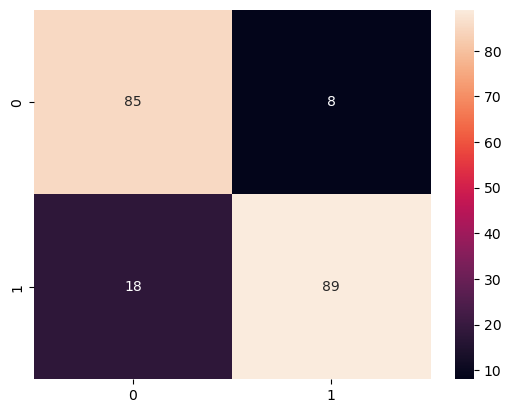

In [39]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

### 2. Повторите диагностику модели регрессии с использованием других видов моделей

#### Метод опорных векторов (SVM) | Исследуйте влияние параметра С на недообучение и переобучение

In [40]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

In [41]:
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
C_values = [0.1, 1, 10, 100, 1000, 10000]
for C in C_values:
    model_svr = SVR(C=C)
    model_svr.fit(X_train, y_train)
    y_pred = model_svr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"SVM с C={C} - MSE: {mse:.4f}")

SVM с C=0.1 - MSE: 38351.7279
SVM с C=1 - MSE: 35191.2757
SVM с C=10 - MSE: 11834.0237
SVM с C=100 - MSE: 2860.4570
SVM с C=1000 - MSE: 2434.7675
SVM с C=10000 - MSE: 2435.8035


#### Метод ближайших соседей (KNN) | Исследуйте влияние количества соседей

In [44]:
from sklearn.neighbors import KNeighborsRegressor

In [45]:
k_values = [1, 3, 5, 7, 9, 11, 13]
for k in k_values:
    model_knn = KNeighborsRegressor(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    y_pred = model_knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"KNN с k={k} - MSE: {mse:.4f}")

KNN с k=1 - MSE: 26559.7342
KNN с k=3 - MSE: 17003.5219
KNN с k=5 - MSE: 14831.3026
KNN с k=7 - MSE: 14092.0183


KNN с k=9 - MSE: 14509.5294
KNN с k=11 - MSE: 14245.9265
KNN с k=13 - MSE: 14296.7278


#### Метод решающих деревьев | Гиперпараметры по вашему выбору

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
depth_values = [3, 5, 10, 20, 4440]
for depth in depth_values:
    model_tree = DecisionTreeRegressor(max_depth=depth)
    model_tree.fit(X_train, y_train)
    y_pred = model_tree.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"DecisionTree с max_depth={depth} - MSE: {mse:.4f}")

DecisionTree с max_depth=3 - MSE: 23008.5595
DecisionTree с max_depth=5 - MSE: 18873.9984
DecisionTree с max_depth=10 - MSE: 19942.9996
DecisionTree с max_depth=20 - MSE: 16706.7922
DecisionTree с max_depth=4440 - MSE: 19660.1170


### 3. Дополните анализ датасета Бостон исследованием модели лассо - постройте кривые обучения для переобученной, недообученной и качественной модели, найдите оптимальное значение параметра регуляризации в модели лассо. 

In [48]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

### 4. В одном из двух первых примеров используйте модель ElasticNet и исследуйте влияние сразу двух параметров регуляризации на эффективность модели. 

In [49]:
from sklearn.linear_model import ElasticNet

In [50]:
alphas = [0.1, 1, 10]
l1_ratios = [0.2, 0.5, 0.8]
for alpha in alphas:
    for l1_ratio in l1_ratios:
        model_en = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        model_en.fit(X_train, y_train)
        y_pred = model_en.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        print(f"ElasticNet с alpha={alpha}, l1_ratio={l1_ratio} - MSE: {mse:.4f}")

ElasticNet с alpha=0.1, l1_ratio=0.2 - MSE: 232.0193
ElasticNet с alpha=0.1, l1_ratio=0.5 - MSE: 97.7103
ElasticNet с alpha=0.1, l1_ratio=0.8 - MSE: 17.7212
ElasticNet с alpha=1, l1_ratio=0.2 - MSE: 8022.6430
ElasticNet с alpha=1, l1_ratio=0.5 - MSE: 4638.8386
ElasticNet с alpha=1, l1_ratio=0.8 - MSE: 1260.6116
ElasticNet с alpha=10, l1_ratio=0.2 - MSE: 31013.3101
ElasticNet с alpha=10, l1_ratio=0.5 - MSE: 27867.3065
ElasticNet с alpha=10, l1_ratio=0.8 - MSE: 19479.6853


### 5. Дополните анализ дерева решений из третьего примера: постройте кривые регуляризации для полного датасета, найдите оптимальную глубину дерева и оцените качество такой модели на всем датасете. Повторите данный анализ используя в качестве метрики эффективности F1.

Невозможно сделать

### 6. Повторите анализ на других реальных датасетах из репозитория OpenML

In [51]:
from openml.datasets import get_dataset
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, r2_score
from sklearn.linear_model import LinearRegression

ModuleNotFoundError: No module named 'openml'

Было предложено 9 датасетов. Я решил взять два с разными задачами и решить их.

#### phoneme - классификация


In [ ]:
dataset = get_dataset(1489)

In [ ]:
dataset

OpenML Dataset
Name.........: phoneme
Version......: 1
Format.......: ARFF
Upload Date..: 2015-05-25 19:34:17
Licence......: Public
Download URL.: https://api.openml.org/data/v1/download/1592281/phoneme.arff
OpenML URL...: https://www.openml.org/d/1489
# of features: None

In [ ]:
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)

In [ ]:
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(1.0, 0.8436632747456059)

#### Ailerons - регрессия


In [ ]:
dataset_reg = get_dataset(43995)

In [ ]:
dataset_reg

OpenML Dataset
Name.........: Ailerons
Version......: 4
Format.......: arff
Upload Date..: 2022-06-16 20:50:39
Licence......: Public
Download URL.: https://api.openml.org/data/v1/download/22103083/Ailerons.arff
OpenML URL...: https://www.openml.org/d/43995
# of features: None

In [ ]:
X, y, _, _ = dataset_reg.get_data(target=dataset_reg.default_target_attribute)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [ ]:
r2_score(y_train, y_pred_train), r2_score(y_test, y_pred_test)

(0.817392820979742, 0.8255621217400366)

**1. Что такое обобщающая способность модели?**

Обобщающая способность модели — это её способность правильно предсказывать результаты на новых, ранее не встречавшихся данных, которые не использовались для её обучения. Модель с хорошей обобщающей способностью будет показывать высокие результаты как на обучающих, так и на тестовых данных, не переобучаясь на обучающем наборе.

**2. Что такое переобучение модели?**

Переобучение (overfitting) происходит, когда модель слишком точно подгоняет свои параметры под обучающие данные, включая шум и случайные колебания в данных. Это приводит к тому, что модель показывает высокие результаты на обучающих данных, но плохо работает на новых, не встречавшихся ранее данных, поскольку она не может обобщить закономерности, а запоминает их.

**3. Какие есть способы борьбы с переобучением?**

- **Уменьшение сложности модели**: Использование более простых моделей, с меньшим количеством параметров или меньшей глубиной деревьев решений.
- **Использование регуляризации**: Это техника добавления штрафа за сложность модели (например, L1 или L2 регуляризация).
- **Увеличение объема обучающих данных**: Дополнительные данные помогают улучшить способность модели к обобщению.
- **Кросс-валидация**: Проверка модели на разных подмножествах данных для выявления её способности к обобщению.
- **Раннее прекращение обучения (early stopping)**: Прекращение обучения, когда производительность модели на валидационных данных перестает улучшаться.
- **Dropout (для нейронных сетей)**: Случайное исключение некоторых нейронов во время тренировки, что предотвращает зависимость от конкретных признаков.

**4. Что такое регуляризация модели, как она работает?**

Регуляризация — это техника добавления дополнительного штрафа на параметры модели (например, веса в линейной регрессии), чтобы ограничить их величину и предотвратить переобучение. Она помогает сделать модель проще и улучшить её обобщающую способность. Регуляризация работает путём добавления штрафа к функции потерь, который зависит от величины параметров модели.

**5. Чем отличаются разные методы регуляризации моделей?**

- **L1-регуляризация (Lasso)**: Добавляет штраф пропорциональный абсолютной величине коэффициентов модели. Это может привести к тому, что некоторые коэффициенты станут равными нулю, что эффективно отбрасывает ненужные признаки.
  
- **L2-регуляризация (Ridge)**: Добавляет штраф пропорциональный квадрату коэффициентов модели. Это уменьшает величину коэффициентов, но не приводит их к нулю, сохраняя все признаки.

- **Elastic Net**: Комбинирует L1 и L2 регуляризации, что позволяет объединить их преимущества и обеспечить более гибкую настройку модели.

**6. Что такое недообучение модели?**

Недообучение (underfitting) — это ситуация, когда модель слишком проста и не может захватить основные закономерности в данных. Это обычно происходит, когда модель недостаточно сложна для решения задачи, имеет слишком мало параметров или использует недостаточное количество признаков.

**7. Какие есть способы борьбы с недообучением?**

- **Увеличение сложности модели**: Использование более сложных моделей с большим количеством параметров.
- **Использование более выразительных признаков**: Применение методов извлечения более сложных признаков или использование новых данных.
- **Увеличение времени обучения**: Возможно, модель не успевает хорошо подогнать свои параметры за меньшее количество итераций.
- **Использование более сложных алгоритмов**: Применение сложных моделей, таких как нейронные сети или случайный лес, если модель слишком простая для данной задачи.